## Example 1:  Installation without conda/pip/apt-get.

In [1]:
# For those who cannot use conda, pip or apt-get to install packages.
# They need to download the whole environment folder from github,
# and then append the "path to modules" to sys.path.

# sys.path explanation:
# When you start a Python interpreter, one of the things it creates automatically is a list that contains 
# all of directories it will use to search for modules when importing.
# This list is available in a variable named sys.path. 

import sys
if "../tesserocr_env/lib/python3.7/site-packages" not in sys.path:
    sys.path.append("../tesserocr_env/lib/python3.7/site-packages")
print(sys.path)

['/Users/michael/tesserocr/src', '/Users/michael/opt/anaconda3/envs/tesserocr_env/lib/python37.zip', '/Users/michael/opt/anaconda3/envs/tesserocr_env/lib/python3.7', '/Users/michael/opt/anaconda3/envs/tesserocr_env/lib/python3.7/lib-dynload', '', '/Users/michael/opt/anaconda3/envs/tesserocr_env/lib/python3.7/site-packages', '/Users/michael/opt/anaconda3/envs/tesserocr_env/lib/python3.7/site-packages/IPython/extensions', '/Users/michael/.ipython', '../tesserocr_env/lib/python3.7/site-packages']


## Example 2: Image to text. 

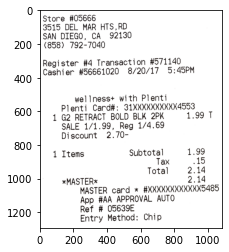

Store #05666

3515 DEL MAR HTS,RD
SAN DIEGO, CA 92130
(858) 792-7040

Register #4 Transaction #571140
Cashier #56661020 8/20/17 5:45PM

wellness+ with Plenti
Plenti Card#: 31XXXXXXXXXX4553
1 G2 RETRACT BOLD BLK 2PK 1.99 T
SALE 1/1.99, Reg 1/4.69
Discount 2.70-

1 Items Subtotal 1.99
Tax .15

Total 2.14
xMASTER* 2.14

MASTER card * #XXXXXXXXXXXX5485
Apo #AA APPROVAL AUTO

Ref # O5639E

Entry Method: Chip

[96, 96, 95, 95, 92, 91, 96, 96, 93, 93, 94, 96, 94, 95, 95, 96, 92, 90, 92, 92, 35, 92, 91, 88, 88, 52, 89, 89, 94, 95, 92, 92, 92, 92, 92, 91, 93, 91, 86, 91, 96, 95, 96, 95, 95, 78, 96, 96, 61, 92, 96, 93, 79, 45, 70, 88, 96, 96, 91, 91, 38, 95, 96, 96]


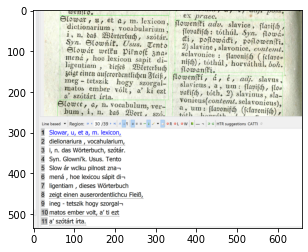

 

 

   

mh hes Tae ed tae ee
ETEK - pv 808 yoraec, Vash aie oD
Glowety u, et a, m. lexicon, floweniti adv. + flavin, |
dictionarium , vocabularium | flovafifh): téthil. Syn. flow.
i, n. 008 Werterbuh, szdtar. i, poflowddi, pofloweniti,
Syn. Slownit. Usus. Lento | 2) slavine. slavoniee anne
Slowdr weltu pitnoft sna- — sclavonice : flavonifs ( jetavoe
|

pens ¢ hoe lexicon sapit di- | nije); tothid, horvathuk bor,
ligentiam , diefes Worterbud — flowanti. a

geigt einen auferordentlidjen Gleifi, wenfti, ¢, ¢, adj. slavus ,
meg tetszik hogy szorgal- slavicus, a, um: flavif, flos
_ Matos ember volt, a’ ki eat vatifch, téth, 2) slavinus, sla-
_@ szotart irta. a anteater Perivontong
Wee, @, n. vocabulum, ver- a, u favonifé ({clavoni
es yi, B. bab Bort” saan: Mavenifs ((clavonig)
Line bosed ~ |Region: «+ 30 /39 + «| «flr |= « ll] ~ Bon ot ow|s|—~|> lee suggestions caTH
Slowar, u, et a, m. lexicon,
dielionariura , vocahularium,
i,n, das Wérterbuch, sz6tér.
Syn. Glowni'k, Usus. Tento
Slow dr 

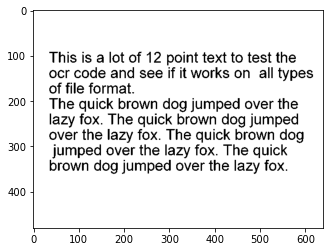

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

[96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 94, 94, 95, 93, 93, 96, 96, 95, 95, 96, 96, 96, 95, 95, 96, 96, 96, 96, 96, 96, 96, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 96]


In [2]:
from tesserocr import PyTessBaseAPI
# only for displaying images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = ["input/sample.jpg", "input/sample2.jpg", "input/sample3.jpg"]

with PyTessBaseAPI() as api:
    for image in images:
        api.SetImageFile(image)
        
        img=mpimg.imread(image)
        imgplot = plt.imshow(img)
        plt.show()
        
        print(api.GetUTF8Text())
        print(api.AllWordConfidences())
# api is automatically finalized when used in a with-statement (context manager).
# otherwise api.End() should be explicitly called when it's no longer needed.

## Example 3: pdf to image. 

In [3]:
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image

from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
'''
We need to specify the [poppler_path] variable to locate the [pdfinfo] executable (from poppler installation).
That is, [poppler_path] is the path to the folder containing [pdfinfo].

Directory tree structure of this project:

/tesserocr
├── src
│   ├── example.ipynb
│
└── tesserocr_env
    ├── bin
       ├── pdfinfo
       
Therefore, when navigating from example.ipynb, "../tesserocr_env/bin" is the folder containing pdfinfo.
''' 
## input pdf file from /tesserocr/src/input
images = convert_from_path('input/pdf2image.pdf', poppler_path="../tesserocr_env/bin")
for i in range(len(images)):
    image = images[i]
    # image.show()
    ## save files in /tesserocr/src/input
    image.save("input/pdf2image"+str(i+1)+".jpg")

## Example 4: Detect image orientation automatically (like if it is rotated by 90 degree).

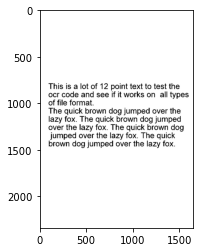

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

[96, 95, 96, 96, 96, 94, 96, 96, 95, 95, 96, 96, 96, 96, 94, 94, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 95, 95, 96, 96, 96, 96, 95, 96, 96, 96, 96, 95, 95, 96, 96, 96, 96, 96, 96, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96]


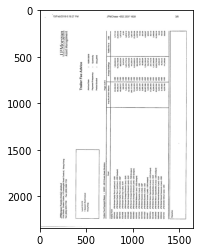

 

JP(Morgan Funds (Asia) Limited J.P Morgan

21st Floor, Chater House, 8 Connaught.Read Central, Hong Kong 3 ees
Tel: (852) 2978.7788 Fax: (852) 2868 1733 Asset Management

 

 

Trailer Fee Advice

Level 13 & 14
1 Queen's Road Central

Hong Kong Advice Date

03/01/2019
Payment Frequency : Quarterly

Period Ended

Dec,2018

 

Trailer Fee Payment Name ; HSBC.- HK Private Bank Division Page 2 of &

           

Avg.No.of Unit/ Shares Average Holdings Trailer Feein USD

                                                 
 

Eqtiity Fund
EEPAAU = JPN Europe Equity Plus A (perf) (ace) - USD

EEPHAU JPM Europe Equity Plus A (perf) (acc) - USD (hedged)
EEPADG JPM Europe Equity Plus A (perf) (dist) - GBP.

ESCADE JPM Europe Small Cap A (dist) - EUR.

ESDAAE JPM. Europe Strategic Dividend A (acc} - EUR

ESDAME JPM Europe Strategic Dividend A (mth) - EUR

ESDAMR — JPM Europe Strategic Dividend A (mth) - RMB (hedged)
ESDAMU = JPM Europe Strategie Dividend A (mth) - USD (hedged)
GLBAAU —_- JPM Glo

In [30]:
# remember to import PSM.
from tesserocr import PyTessBaseAPI, PSM
# only for displaying images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = ["input/pdf2image3.jpg", "input/pdf2image4.jpg"]

# By specifying psm=PSM.AUTO_OSD, we can detect images even when some of them are rotated by 90 degree.
# There are other page segmentation modes (PSMs):
'''
0 : OSD_ONLY: Orientation and script detection only.
1 : AUTO_OSD: Automatic page segmentation with orientation and script detection. (OSD)
2 : AUTO_ONLY: Automatic page segmentation, but no OSD, or OCR.
3 : AUTO: Fully automatic page segmentation, but no OSD. (default mode for tesserocr)
4 : SINGLE_COLUMN: Assume a single column of text of variable sizes.
5 : SINGLE_BLOCK_VERT_TEXT: Assume a single uniform block of vertically aligned text.
6 : SINGLE_BLOCK: Assume a single uniform block of text.
7 : SINGLE_LINE: Treat the image as a single text line.
8 : SINGLE_WORD: Treat the image as a single word.
9 : CIRCLE_WORD: Treat the image as a single word in a circle.
10 : SINGLE_CHAR: Treat the image as a single character.
11 : SPARSE_TEXT: Find as much text as possible in no particular order.
12 : SPARSE_TEXT_OSD: Sparse text with orientation and script detection
13 : RAW_LINE: Treat the image as a single text line, bypassing hacks that are Tesseract-specific.
'''

with PyTessBaseAPI(psm=PSM.AUTO_OSD) as api:
    for image in images:
        api.SetImageFile(image)
        
        img=mpimg.imread(image)
        imgplot = plt.imshow(img)
        plt.show()
        
        print(api.GetUTF8Text())
        print(api.AllWordConfidences())
# api is automatically finalized when used in a with-statement (context manager).
# otherwise api.End() should be explicitly called when it's no longer needed.

## Example 5: Break image into blocks.

In [ ]:
# remember to import PSM.
from tesserocr import PyTessBaseAPI, PSM, iterate_level, PT, RIL
from PIL import Image
# only for displaying images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

def FirstImage(inputImagePath):
    with PyTessBaseAPI(psm=PSM.AUTO_OSD) as api:
        image = Image.open(inputImagePath)
        width, height = image.size
        api.SetImage(image)
        orientation, direction, order, deskew_angle = api.AnalyseLayout().Orientation()
        if orientation == 0:
            transposedImage = image
            firstTupleList = [(transposedImage, 0, 0, width, height)]
        elif orientation == 1:
            transposedImage = image.rotate(90, expand=True)
            firstTupleList = [(transposedImage, 0, 0, height, width)]
        elif orientation == 2:
            transposedImage = image.rotate(180, expand=True)
            firstTupleList = [(transposedImage, 0, 0, width, height)]
        elif orientation == 3:
            transposedImage = image.rotate(270, expand=True)
            firstTupleList = [(transposedImage, 0, 0, height, width)]
        img = transposedImage.convert(mode="RGB")
        im=mpimg.pil_to_array(img)
        imgplot = plt.imshow(im)
        plt.show()
    
    return firstTupleList

# firstTupleList/subImagesTupleList is a list of tuples.
'''
[(PIL.JpegImagePlugin.JpegImageFile image, int left, int top, int right, int bottom),
(PIL.JpegImagePlugin.JpegImageFile image, int left, int top, int right, int bottom),
(PIL.JpegImagePlugin.JpegImageFile image, int left, int top, int right, int bottom),
...
(PIL.JpegImagePlugin.JpegImageFile image, int left, int top, int right, int bottom)]
'''
# This function returns a list of tuples under the same structure.
def BreakImagesIntoImages(subImagesTupleList, pageIteratorLevel):
    newImages = []
    with PyTessBaseAPI() as api:
        for (image, left, top, right, bottom) in subImagesTupleList:
            api.SetImage(image)
        
            for block in iterate_level(api.AnalyseLayout(), pageIteratorLevel):
                if (block == None):
                    break
                img = block.GetBinaryImage(pageIteratorLevel)
                left_relative, top_relative, right_relative, bottom_relative = block.BoundingBoxInternal(pageIteratorLevel)
                
                # Remove duplicate elements
                isDuplicate = False
                for (i, l, t, r, b) in newImages:
                    if l==left_relative+left and t==top_relative+top and r==right_relative+left and b==bottom_relative+top:
                        isDuplicate = True
                if not isDuplicate:
                    newImages.append((img, left_relative+left, top_relative+top, right_relative+left, bottom_relative+top))
    return newImages

def ShowImages(subImagesTupleList):
    for (image, left, top, right, bottom) in subImagesTupleList: 
        if (image == None):
            continue
        img = image.convert(mode="RGB")
        im=mpimg.pil_to_array(img)
        imgplot = plt.imshow(im)
        plt.show()
        l = []
        l.append(left)
        l.append(top)
        l.append(right)
        l.append(bottom)
        print(l)
        
def PlotRectangles(firstTupleList, subImagesTupleList):
    for (image, left, top, right, bottom) in firstTupleList:
        img = image.convert(mode="RGB")
        im=mpimg.pil_to_array(img)
    
        fig,ax = plt.subplots(1)
        imgplot = ax.imshow(im)
    
        for (i, l, t, r, b) in subImagesTupleList:
            # Create a Rectangle patch
            rect = patches.Rectangle((l,t),r-l,b-t,linewidth=1,edgecolor='r',facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

        plt.show()
    


tuples0 = FirstImage("input/pdf2image4.jpg")
tuples1 = BreakImagesIntoImages(tuples0, 0)
tuples2 = BreakImagesIntoImages(tuples1, 1)
tuples3 = BreakImagesIntoImages(tuples2, 2)
#ShowImages(tuples3)
# print(len(tuples0))
# print(len(tuples1))
# print(len(tuples2))
# print(len(tuples3))
PlotRectangles(tuples0, tuples1)
PlotRectangles(tuples0, tuples2)

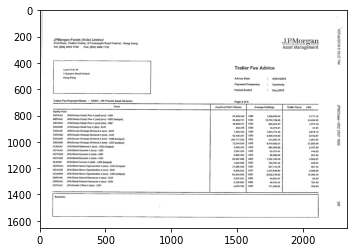

JPMorgan Funds (Asia) Limited


---------------------------------------
21st Floor, Chater House, 8 Connaught.Read Central, Hong Kong


---------------------------------------
Tel: (852) 2978.7788 Fax: (852) 2868 1733


---------------------------------------
 


---------------------------------------
Level 13 & 14
1 Queen's Road Central


---------------------------------------
Hong Keng


---------------------------------------
Trailer Fee Payment Name :; HSBC - HK Private Bank Division


---------------------------------------
   


---------------------------------------
Equity Fund
EEPAAU
REPHAU
EEPADG
ESCADE
ESDAAE
ESDAME
ESDAMR
ESDAMU
GLBAAU
GDYAAU
GDYADG
GDYADU
GLIAMU
GMOHAA
GCAAAE
GCAHAU
GNRAAE
GNRAAU
GCFAAU


---------------------------------------
Remarks:


---------------------------------------
 


---------------------------------------
JPM Eurape Equity Plus A (perf) (acc) - USD


---------------------------------------
JPM Europe Equity Plus A (perf) (acc) - USD (hedg

In [8]:
# remember to import PSM.
from tesserocr import PyTessBaseAPI, PSM, iterate_level, PT, RIL
# only for displaying images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = ["input/pdf2image4.jpg"]


with PyTessBaseAPI(psm=PSM.AUTO_OSD) as api:
    for image in images:
        api.SetImageFile(image)
        api.Recognize()
        
        img=mpimg.imread(image)
        imgplot = plt.imshow(img)
        plt.show()
        
        #print(api.GetUTF8Text())
        #print(api.AllWordConfidences())
        
        count = 0
        for block in iterate_level(api.GetIterator(), RIL.BLOCK):
            for para in iterate_level(block, RIL.PARA):
                count=count+1
                print(para.GetUTF8Text(RIL.PARA))
                print("---------------------------------------")
        print(count)
# api is automatically finalized when used in a with-statement (context manager).
# otherwise api.End() should be explicitly called when it's no longer needed.